In [1]:
import pandas as pd
import numpy as np
df_mnc=pd.read_csv('mnc_salary.csv')
df_mnc

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [2]:
#lets check the null value
df_mnc.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

In [3]:
#lets check the correlation matrix
df_mnc.corr()

,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.112386
Age,0.028724,1.000000,0.087183,0.213459
Weight,0.206921,0.087183,1.000000,0.138321
Salary,-0.112386,0.213459,0.138321,1.000000


In [4]:
df_mnc.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [5]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='mean')
df_mnc['Salary']=imp.fit_transform(df_mnc['Salary'].values.reshape(-1,1))
df_mnc

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2.900000e+06


In [6]:
imp=SimpleImputer(strategy='most_frequent')
df_mnc['College']=imp.fit_transform(df_mnc['College'].values.reshape(-1,1))
df_mnc

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,Kentucky,2.900000e+06


In [7]:
df_mnc['Number']=df_mnc['Number'].replace(0,df_mnc['Number'].mean())

In [8]:
df_mnc.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
DOJ         0
Weight      0
College     0
Salary      0
dtype: int64

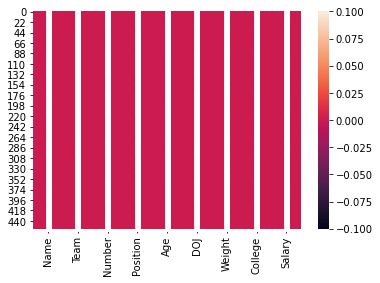

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_mnc.isnull(),annot=True)
plt.show()
# we can see there is no null value present

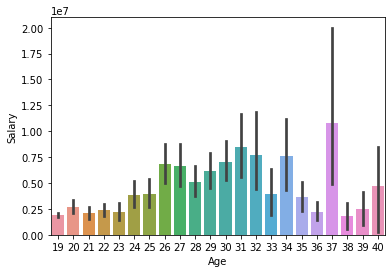

In [10]:
# lets check avg team according to salary
sns.barplot(x='Age',y='Salary',data=df_mnc)
plt.show()
# we can see that the salary ups and down based on Age

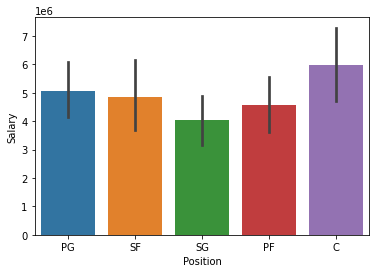

In [11]:
sns.barplot(x='Position',y='Salary',data=df_mnc)
plt.show()
# we can see the different position employee getting different salary 

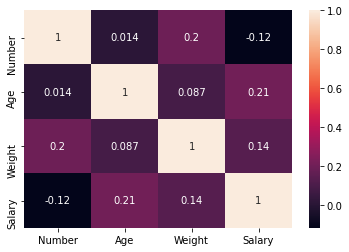

In [12]:
sns.heatmap(df_mnc.corr(),annot=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_mnc['Position']=le.fit_transform(df_mnc['Position'].astype(str))

In [15]:
df_mnc

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,17.678337,2,25,06-Feb,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.000000,3,25,06-Jun,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.000000,4,27,06-May,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.000000,4,22,06-May,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.000000,1,29,06-Oct,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.000000,1,20,06-Oct,234,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8.000000,2,26,06-Mar,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.000000,2,24,06-Jan,179,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.000000,0,26,07-Mar,256,Kentucky,2.900000e+06


In [16]:
df_mnc['Position']=df_mnc['Position'].replace(0,df_mnc['Position'].mean())

In [17]:
df_mnc

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,17.678337,2.00000,25,06-Feb,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.000000,3.00000,25,06-Jun,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.000000,4.00000,27,06-May,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.000000,4.00000,22,06-May,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.000000,1.00000,29,06-Oct,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.000000,1.00000,20,06-Oct,234,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8.000000,2.00000,26,06-Mar,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.000000,2.00000,24,06-Jan,179,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.000000,2.07221,26,07-Mar,256,Kentucky,2.900000e+06


In [18]:
inp=df_mnc.drop(columns=['Salary','Name','Team','DOJ','College'])
out=pd.DataFrame(df_mnc['Salary'])

In [19]:
df_mnc=pd.concat([inp,out],axis=1)
df_mnc

,Number,Position,Age,Weight,Salary
0,17.678337,2.00000,25,180,7.730337e+06
1,99.000000,3.00000,25,235,6.796117e+06
2,30.000000,4.00000,27,205,4.842684e+06
3,28.000000,4.00000,22,185,1.148640e+06
4,8.000000,1.00000,29,231,5.000000e+06
...,...,...,...,...,...
452,41.000000,1.00000,20,234,2.239800e+06
453,8.000000,2.00000,26,203,2.433333e+06
454,25.000000,2.00000,24,179,9.000000e+05
455,21.000000,2.07221,26,256,2.900000e+06


In [20]:
#lets checkj the skewed data
df_mnc.skew()

Number      1.734184
Position    0.210959
Age         0.626349
Weight      0.113788
Salary      1.595511
dtype: float64

In [21]:
# as we can see the data is skewed lets treat the skewness of data using log transform

import numpy as np
for col in df_mnc.columns:
    if df_mnc.skew().loc[col]>0.55:
        df_mnc[col]=np.log1p(df_mnc[col])

In [22]:
df_mnc.skew()

Number     -0.417366
Position    0.210959
Age         0.284946
Weight      0.113788
Salary     -0.450091
dtype: float64

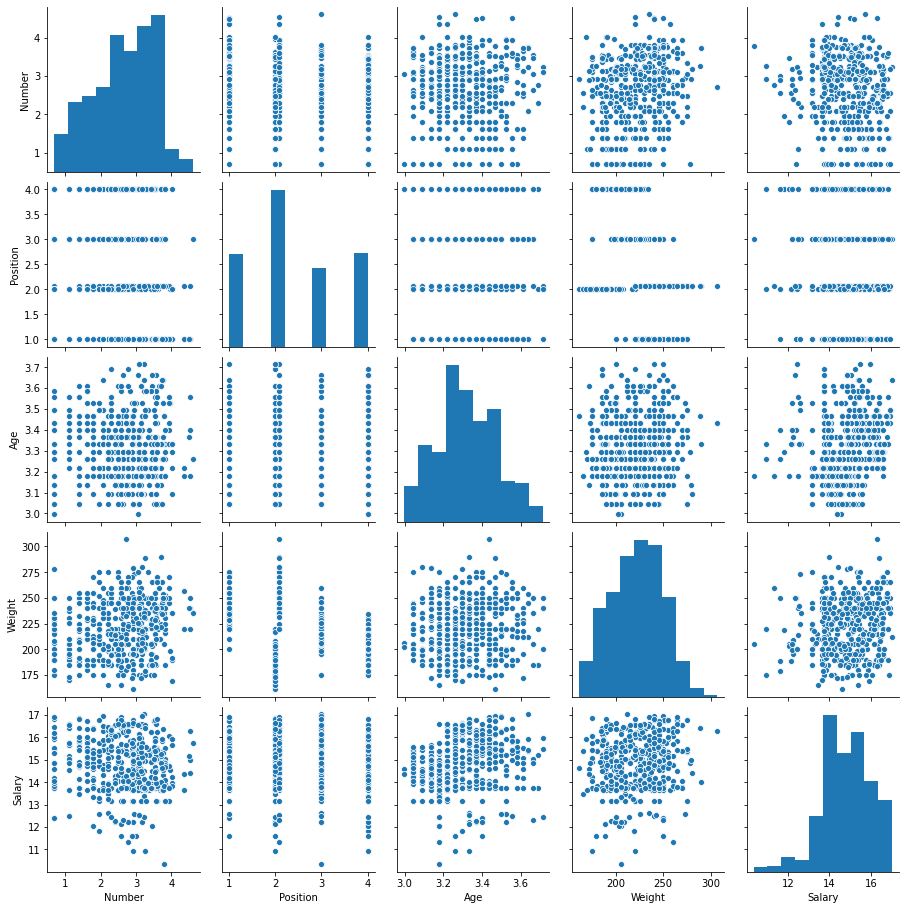

In [23]:
#lets check the pair plot using Seborn
sns.pairplot(df_mnc)
plt.show()

In [24]:
# lets check the outliers present in the data sets
from scipy.stats import zscore
z_score=abs(zscore(df_mnc))
print(df_mnc.shape)
df_mnc_final=df_mnc.loc[(z_score<3).all(axis=1)]
print(df_mnc_final.shape)
# we can see there were outliers present in the datasets

(457, 5)
(453, 5)


In [25]:
# lets segreagate input and output
df_x=df_mnc.drop(columns=['Salary'])
y=pd.DataFrame(df_mnc['Salary'])

In [26]:
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [27]:
# lets recheck skewness again before regression process
x.skew()
#there is no skewed data present

Number     -0.417366
Position    0.210959
Age         0.284946
Weight      0.113788
dtype: float64

In [28]:
#lets apply regression to datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('max r2 score correponding to',final_r_state,'is',max_r_score)
    return final_r_state

In [29]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,df_x,y)


max r2 score correponding to 59 is 0.13186629282549112


In [30]:
# lets apply grid search cv bacuase the r2_score we are getting very less,lets apply KNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(df_x,y)
gknr.best_params_

{'n_neighbors': 29}

In [31]:
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,df_x,y)


max r2 score correponding to 95 is 0.07475575405156076


In [32]:
from sklearn.model_selection import cross_val_score
print('mean cross val score for linear regresion:',cross_val_score(lreg,df_x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Linear Regression',cross_val_score(lreg,df_x,y,cv=5,scoring='r2').mean())
print()
print('mean cross val score for KNN regression:',cross_val_score(knr,df_x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for KNN Regression',cross_val_score(knr,df_x,y,cv=5,scoring='r2').std())

mean cross val score for linear regresion: 0.04538060543823215
standard deviation in r2 score for Linear Regression 0.04538060543823215

mean cross val score for KNN regression: -0.022273601285986655
standard deviation in r2 score for KNN Regression 0.04632832086632592


In [33]:
# lets apply lasso regression
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(df_x,y)
clf.best_params_

{'alpha': 0.001}

In [34]:
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,df_x,y)


max r2 score correponding to 59 is 0.131138406141464


In [35]:
print('mean cross val score for lasso regression:',cross_val_score(lsreg,df_x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for lasso Regression',cross_val_score(lsreg,df_x,y,cv=5,scoring='r2').std())

mean cross val score for lasso regression: 0.04562849355664178
standard deviation in r2 score for lasso Regression 0.03382320926058613


In [36]:
#lets apply gradientboostingregressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
# use n_estimator with step of 50
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_


{'learning_rate': 0.01, 'n_estimators': 100}

In [37]:
gbr=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100)
r_state=maxr2_score(gbr,df_x,y)


max r2 score correponding to 59 is 0.15048571075018213


In [38]:
print('mean cross val score for GBR regression:',cross_val_score(gbr,df_x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for GBR Regression',cross_val_score(gbr,df_x,y,cv=5,scoring='r2').std())

mean cross val score for GBR regression: 0.05826178913973286
standard deviation in r2 score for GBR Regression 0.02889039164668249


In [39]:
#lets apply adaboostregressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_

{'base_estimator': Lasso(alpha=0.001),
 'learning_rate': 0.1,
 'n_estimators': 10}

In [40]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=100)
r_state=maxr2_score(ada_reg,df_x,y)


max r2 score correponding to 67 is 0.12826291250459187


In [41]:
# so we tried all the model and come to conclusion that gradient boosting is working well among all
# random_state corresponding to highest r2_score is 59
x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=59,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [42]:
#lets find out r2 and RMSE score usin sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
print('mean cross val score for GBR regression:',cross_val_score(gbr,df_x,y,cv=5,scoring='r2').mean())
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is: ',r2_score(y_test,y_pred))

mean cross val score for GBR regression: 0.05826178913973286
RMSE 1.0832475587712398
r2_score is:  0.15099913733669101


In [43]:
import joblib
#save the model as pkl file
joblib.dump(gbr,'mnc_salary.pkl')

['mnc_salary.pkl']